### Preparation

In [20]:
# Prepare modules
import numpy as np
import torch

from sklearn.datasets import make_moons  # Half moon 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

### Prepare Data

In [27]:
# Generate data
x, y = make_moons(n_samples = 1000,
                  noise = 0.1,
                  random_state = 85)

### Visualization

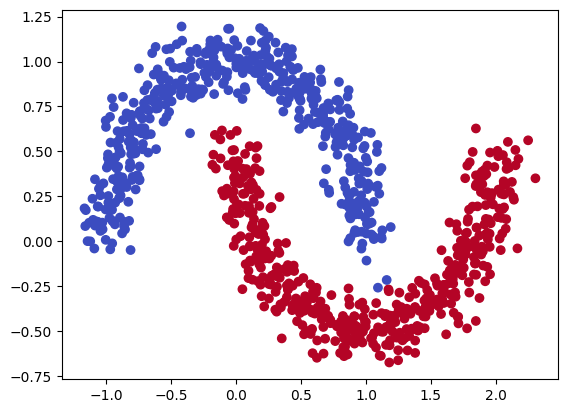

In [28]:
# Visualization
plt.scatter(x[:, 0], x[:, 1],
            c = y,
            cmap = plt.cm.coolwarm)
plt.show()

### Generate Outliers

In [30]:
# Set parameters
outliers_ratio = 0.1
n_outliers = int(outliers_ratio * len(x))
n_inliers = len(x) - n_outliers

# Set Random Number Generation object
rng = np.random.RandomState(85)
print(rng)

# Generate outliers
#  : Generate random values along uniform distribution -> multiply 1.5 -> Generate outliers
x_outliers = 1.5 * rng.uniform(low = -1,
                               high = 3,
                               size = (n_outliers, 2))
print(x_outliers)

RandomState(MT19937)
[[ 2.22224289e+00  1.55371841e+00]
 [ 2.89469051e-01  2.42279227e+00]
 [ 1.41039206e-01  1.63875647e+00]
 [ 7.39498453e-01  7.15671561e-01]
 [ 2.90816161e+00  2.39183325e+00]
 [ 4.05478041e+00 -1.37111139e-01]
 [ 9.33316522e-01  3.80208444e+00]
 [-2.46593307e-01 -2.17276424e-01]
 [ 2.00642108e-01  1.21877303e+00]
 [ 5.25428321e-01 -1.42957641e+00]
 [ 8.81681237e-01  2.63485386e+00]
 [ 3.51121984e+00  3.94730914e-01]
 [ 2.81513466e+00  1.52993914e+00]
 [ 7.04953198e-01 -4.02234897e-01]
 [ 1.71995496e+00 -1.31034011e+00]
 [ 2.09155285e+00  3.15656963e+00]
 [-1.57652823e-01  2.25763735e+00]
 [ 9.73920636e-01  2.22643544e+00]
 [-6.25215513e-02  3.43543572e-01]
 [ 4.97559865e-02 -9.37408068e-01]
 [ 1.64489684e+00  3.70051177e+00]
 [ 1.01779442e+00 -1.80695564e-01]
 [ 4.43751882e+00 -8.97785415e-01]
 [-1.49016071e+00  2.12238447e+00]
 [ 4.36896632e+00  2.52439288e+00]
 [ 2.24065093e+00  3.70670553e-01]
 [ 3.40709378e+00 -1.02225859e+00]
 [ 3.68895822e+00  2.69324693e+00]

In [32]:
# Add outliers to the existing dataset
x = np.vstack([x, x_outliers])

# Set a class of outliers as '-1'
y = np.hstack([y, -1 * np.ones(n_outliers)])

print(x, y)

[[ 1.79585418 -0.28391228]
 [-0.96790637  0.54969726]
 [ 1.18744319 -0.47341116]
 ...
 [ 3.33283687  2.146309  ]
 [-1.38713251  1.1345231 ]
 [-0.30094877 -1.31662083]] [ 1.  0.  1. ... -1. -1. -1.]


### Normalization

In [34]:
# Normalization
x = (x - x.mean(axis=0)) / x.std(axis=0)
print(x)

[[ 0.79882923 -0.73292124]
 [-1.44447409  0.06826448]
 [ 0.30499108 -0.91504943]
 ...
 [ 2.04637522  1.60277489]
 [-1.78475372  0.63034311]
 [-0.90311453 -1.72546187]]


### Split Dataset

In [35]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 85)

print('x_train: ', len(x_train))
print('x_test: ', len(x_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

x_train:  1144
x_test:  286
y_train:  1144
y_test:  286


### Fit One-Class SVM Model

In [36]:
# Fit models
model = OneClassSVM(nu = 0.05,
                    kernel = 'rbf',
                    gamma = 'auto')
print(model)
model.fit(x_train)

OneClassSVM(gamma='auto', nu=0.05)


OneClassSVM(gamma='auto', nu=0.05)

### Detect Abnormality

- F1 Score
  - Values between 0 and 1 
  - 

In [39]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred == 1,
                  0,
                  y_pred)
score = f1_score(y_test,
                 y_pred,
                 average = 'macro')
print('F1 Score: ', score)  

F1 Score:  0.3105053044839983


### Visualization 

In [41]:
# Get predicted results of all data
y_pred_all = model.predict(x)
print(y_pred_all)

[ 1  1  1 ...  1 -1  1]


In [42]:
# Seperate normal data and outliers
x_inliers = x[y == 0]
x_outliers = x[y == -1]
y_pred_inliers = y_pred_all[y == 0]
y_pred_outliers = y_pred_all[y == -1]

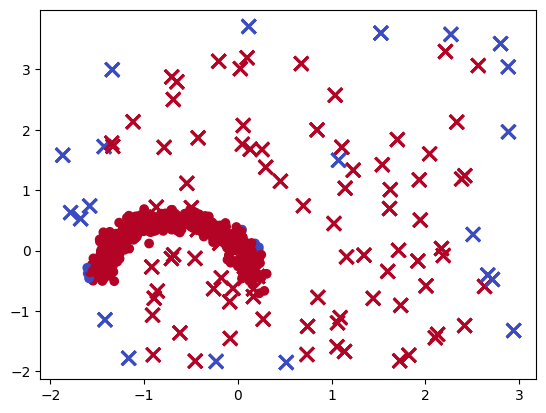

In [44]:
# Visualization
plt.scatter(x_inliers[:, 0], x_inliers[:, 1], 
            c = y_pred_inliers, 
            cmap = plt.cm.coolwarm)
plt.scatter(x_outliers[:, 0], x_outliers[:, 1], 
            c = y_pred_outliers, 
            cmap = plt.cm.coolwarm, 
            marker = 'x', 
            s = 100, 
            linewidth = 2)
plt.show()